In [1]:
# Import dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats

# Set seaborn as main style for graphs so all graphs have the same style

sb.set()

# Read the Citation Count by District CSV

citation_count_df = pd.read_csv("Citation_Count_by_District.csv", encoding="UTF-8", low_memory = False)  

# Display the data

citation_count_df.head()

,District,Citation Count
0,los angeles,265174
1,west hollywood,219074
2,beverly hills,78896
3,santa monica,74713
4,san fernando,71154


In [2]:
# Read the Yelp file

yelp_data = pd.read_csv("yelp_by_district_data4k.csv", encoding="UTF-8", low_memory = False)  

# Display the data

yelp_data.head()

,category,latitude,longitude,name,rating,review_count,district
0,sushi,34.020103,-118.493409,かっぽう おせん - Kappo Osen,5.0,34,santa monica
1,spanish,34.002788,-118.484641,Manchego,4.5,835,santa monica
2,newamerican,34.017951,-118.493020,Tar & Roses,4.5,2115,santa monica
3,bars,34.011040,-118.494910,The Lobster,4.0,2306,santa monica
4,bars,34.015401,-118.496658,The Misfit Restaurant + Bar,4.0,3792,santa monica


In [3]:
# Using groupby() and sum(), get the total number of Yelp reviews by district

yelp_count_by_district = pd.DataFrame(yelp_data.groupby("district").sum()["review_count"])

# Clean up the data frame 
# Reset the index
# Rename the column so that the two data frames can be merged by district

yelp_count_by_district = yelp_count_by_district.reset_index()
yelp_count_by_district = yelp_count_by_district.rename(columns={"district":"District"})

# Display the data frame

yelp_count_by_district.head()

,District,review_count
0,akron,15
1,avon,2242
2,avon lake,1228
3,bay village,1181
4,berea,2066


In [4]:
# Merge the Yelp Review Count and Citation Count data frames on the "District" column

yelp_count_by_citation_count = yelp_count_by_district.merge(citation_count_df, how = "outer", on = "District")

# Display the merged data

yelp_count_by_citation_count.head()

,District,review_count,Citation Count
0,akron,15.0,NaN
1,avon,2242.0,NaN
2,avon lake,1228.0,NaN
3,bay village,1181.0,NaN
4,berea,2066.0,NaN


In [5]:
# Get rid of NaN values by using dropna()

clean_yelp_count_citation_count = yelp_count_by_citation_count.dropna()

# Display cleaned data frame

clean_yelp_count_citation_count.head()

,District,review_count,Citation Count
5,beverly hills,258077.0,78896.0
7,burbank,3859.0,35155.0
8,calabasas,131993.0,33683.0
10,culver city,219083.0,58956.0
11,el segundo,30310.0,11626.0


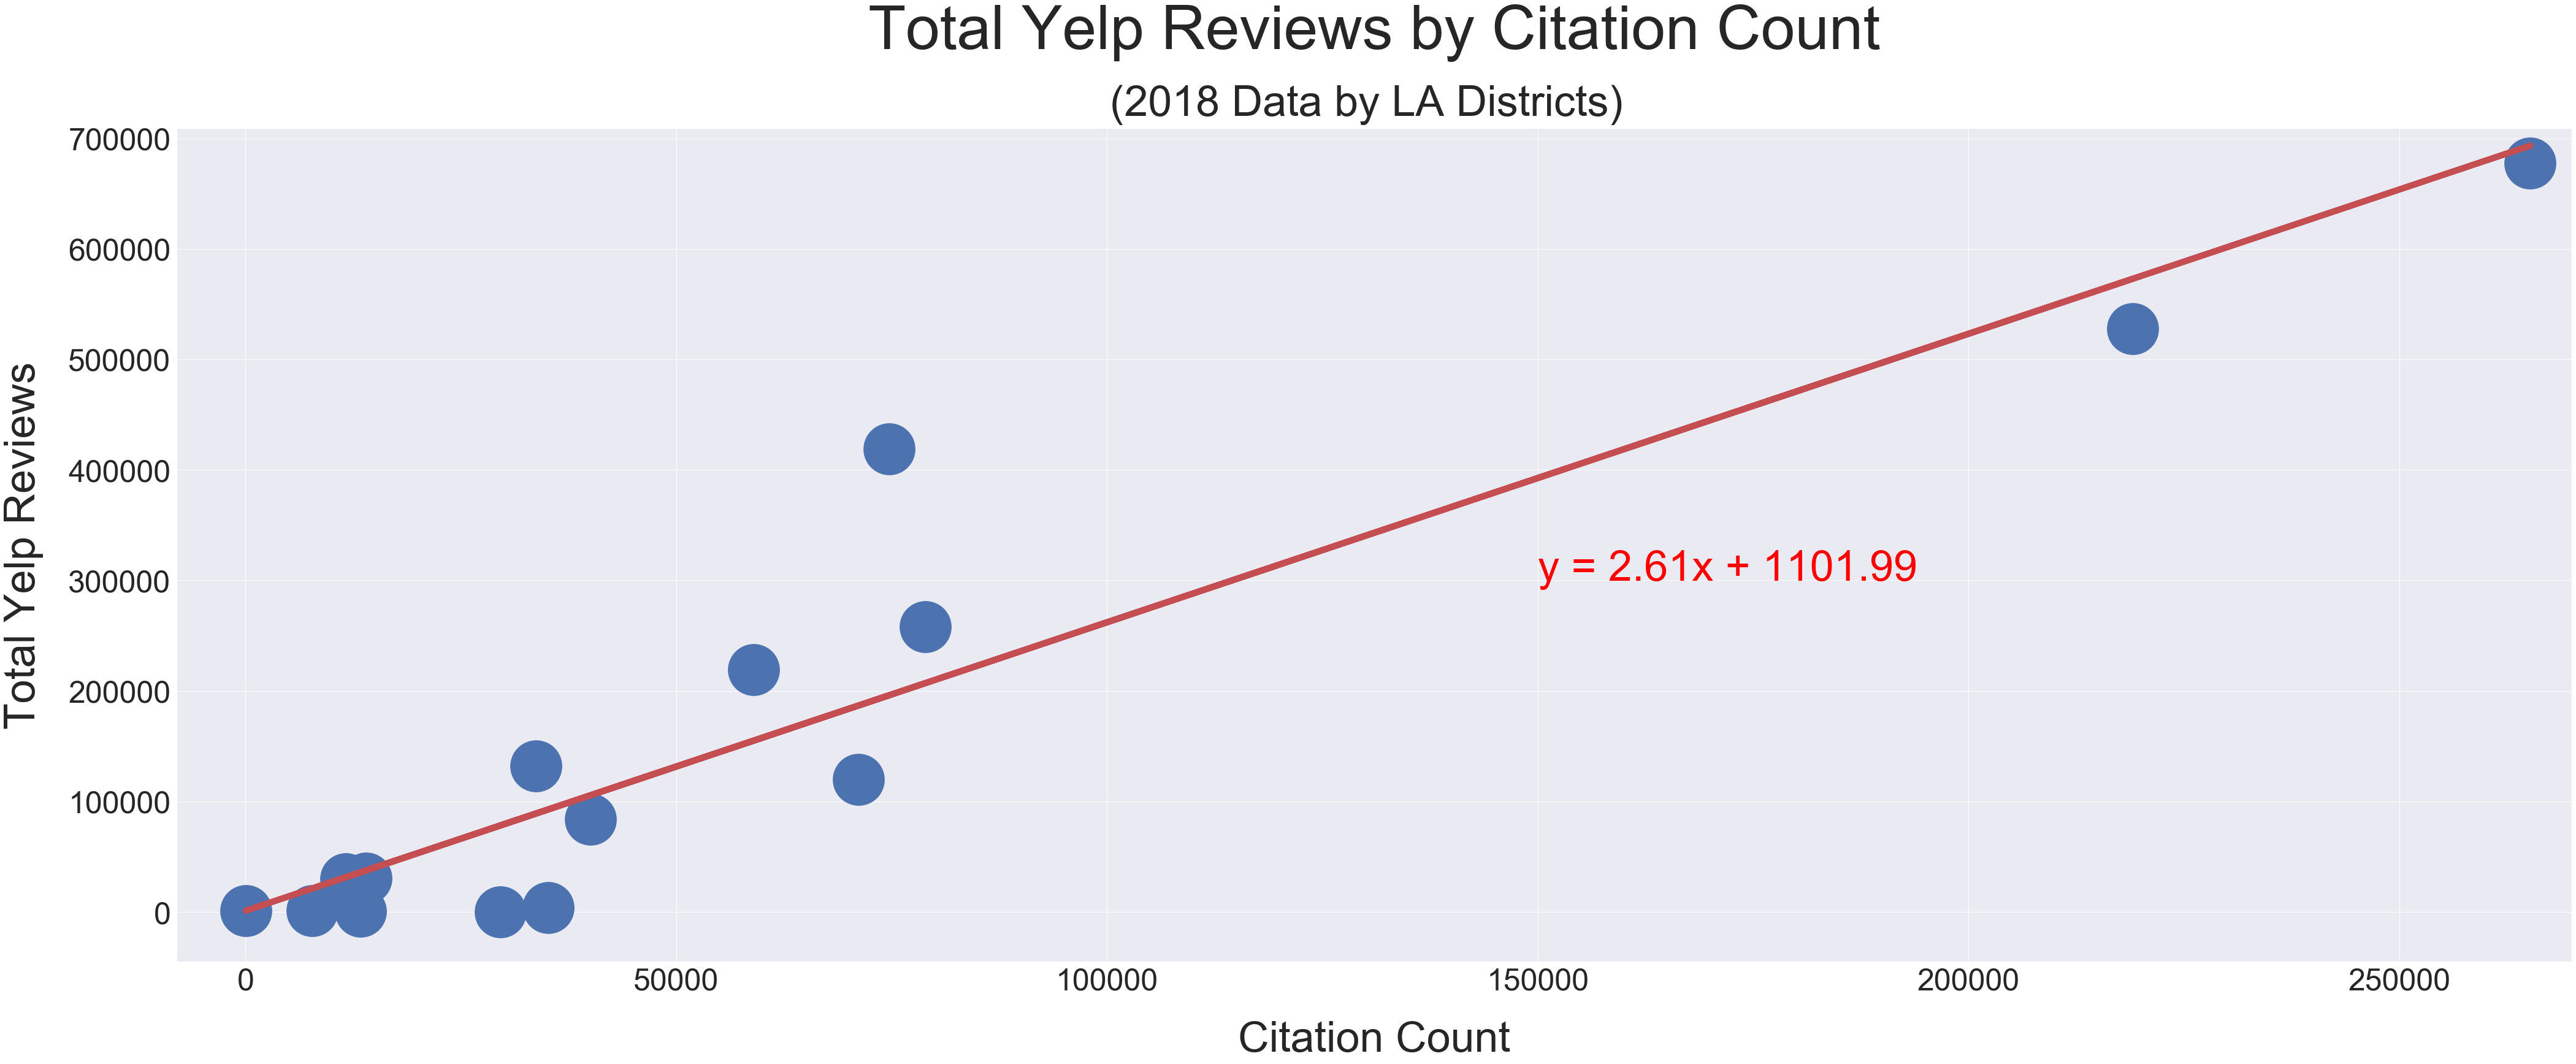

In [6]:
# Plot the data frame created above

fig = plt.figure(figsize=(70,25))

# Set the x and y variables

rev_count = clean_yelp_count_citation_count["review_count"]
citation_count = clean_yelp_count_citation_count["Citation Count"]

# Plot using scatter plot

plt.scatter(citation_count, rev_count, s=7000)

# Set the x and y ticks for the graph so that the data is displayed clearly

plt.xticks(ticks=np.arange(0, 270900, 50000), fontsize=50)
plt.yticks(ticks=np.arange(0, 800000, 100000), fontsize=50)

# Set the x and y limits so that the graph display doesn't cut any information off

plt.xlim(-8000,270000)
plt.ylim(-45000,709000)

# Set the x and y labels, the title, and a subtitle

plt.xlabel('Citation Count', fontsize=70, labelpad=40)
plt.ylabel('Total Yelp Reviews', fontsize=70, labelpad=40)
plt.title("Total Yelp Reviews by Citation Count", fontsize=100, pad = 130)
plt.suptitle("(2018 Data by LA Districts)", x = 0.51, y =0.92,fontsize=70)

# Get the regression line for the data and plot it on the graph
# Create the line equation and place it on the graph for visualization

yc_slope, yc_int, yc_r, yc_p, yc_std_err = stats.linregress(citation_count, rev_count)
yc_fit = yc_slope*citation_count+yc_int
line_eq = "y = " + str(round(yc_slope,2)) + "x + " + str(round(yc_int,2))
plt.annotate(line_eq,(150000, 300000),fontsize=70,color="red")

# Plot the regression line

plt.plot(citation_count,yc_fit,"r-",linewidth=10)

In [7]:
# Save the graph image

fig.savefig('Total_Yelp_Reviews_by_Citation_Count_Reg.png')

# Close the graph

plt.close()

In [8]:
# Use groupby() and mean() to get the average yelp review ratings by district

yelp_rev_by_district = pd.DataFrame(yelp_data.groupby("district").mean()["rating"])

# Clean up data frame
# Reset index 
# Rename the column "district" to "District" to merge the two data frames

yelp_rev_by_district = yelp_rev_by_district.reset_index()
yelp_rev_by_district = yelp_rev_by_district.rename(columns={"district":"District"})

# Display the data frame

yelp_rev_by_district.head()

,District,rating
0,akron,4.500000
1,avon,3.460784
2,avon lake,3.479167
3,bay village,3.673913
4,berea,3.595745


In [9]:
# Drop NaN values

yelp_rev_by_citation_count = (yelp_rev_by_district.merge(citation_count_df, how = "outer", on = "District")).dropna()

# Display merged data

yelp_rev_by_citation_count.head()

,District,rating,Citation Count
5,beverly hills,4.120312,78896.0
7,burbank,4.450000,35155.0
8,calabasas,4.137874,33683.0
10,culver city,4.114478,58956.0
11,el segundo,4.039474,11626.0


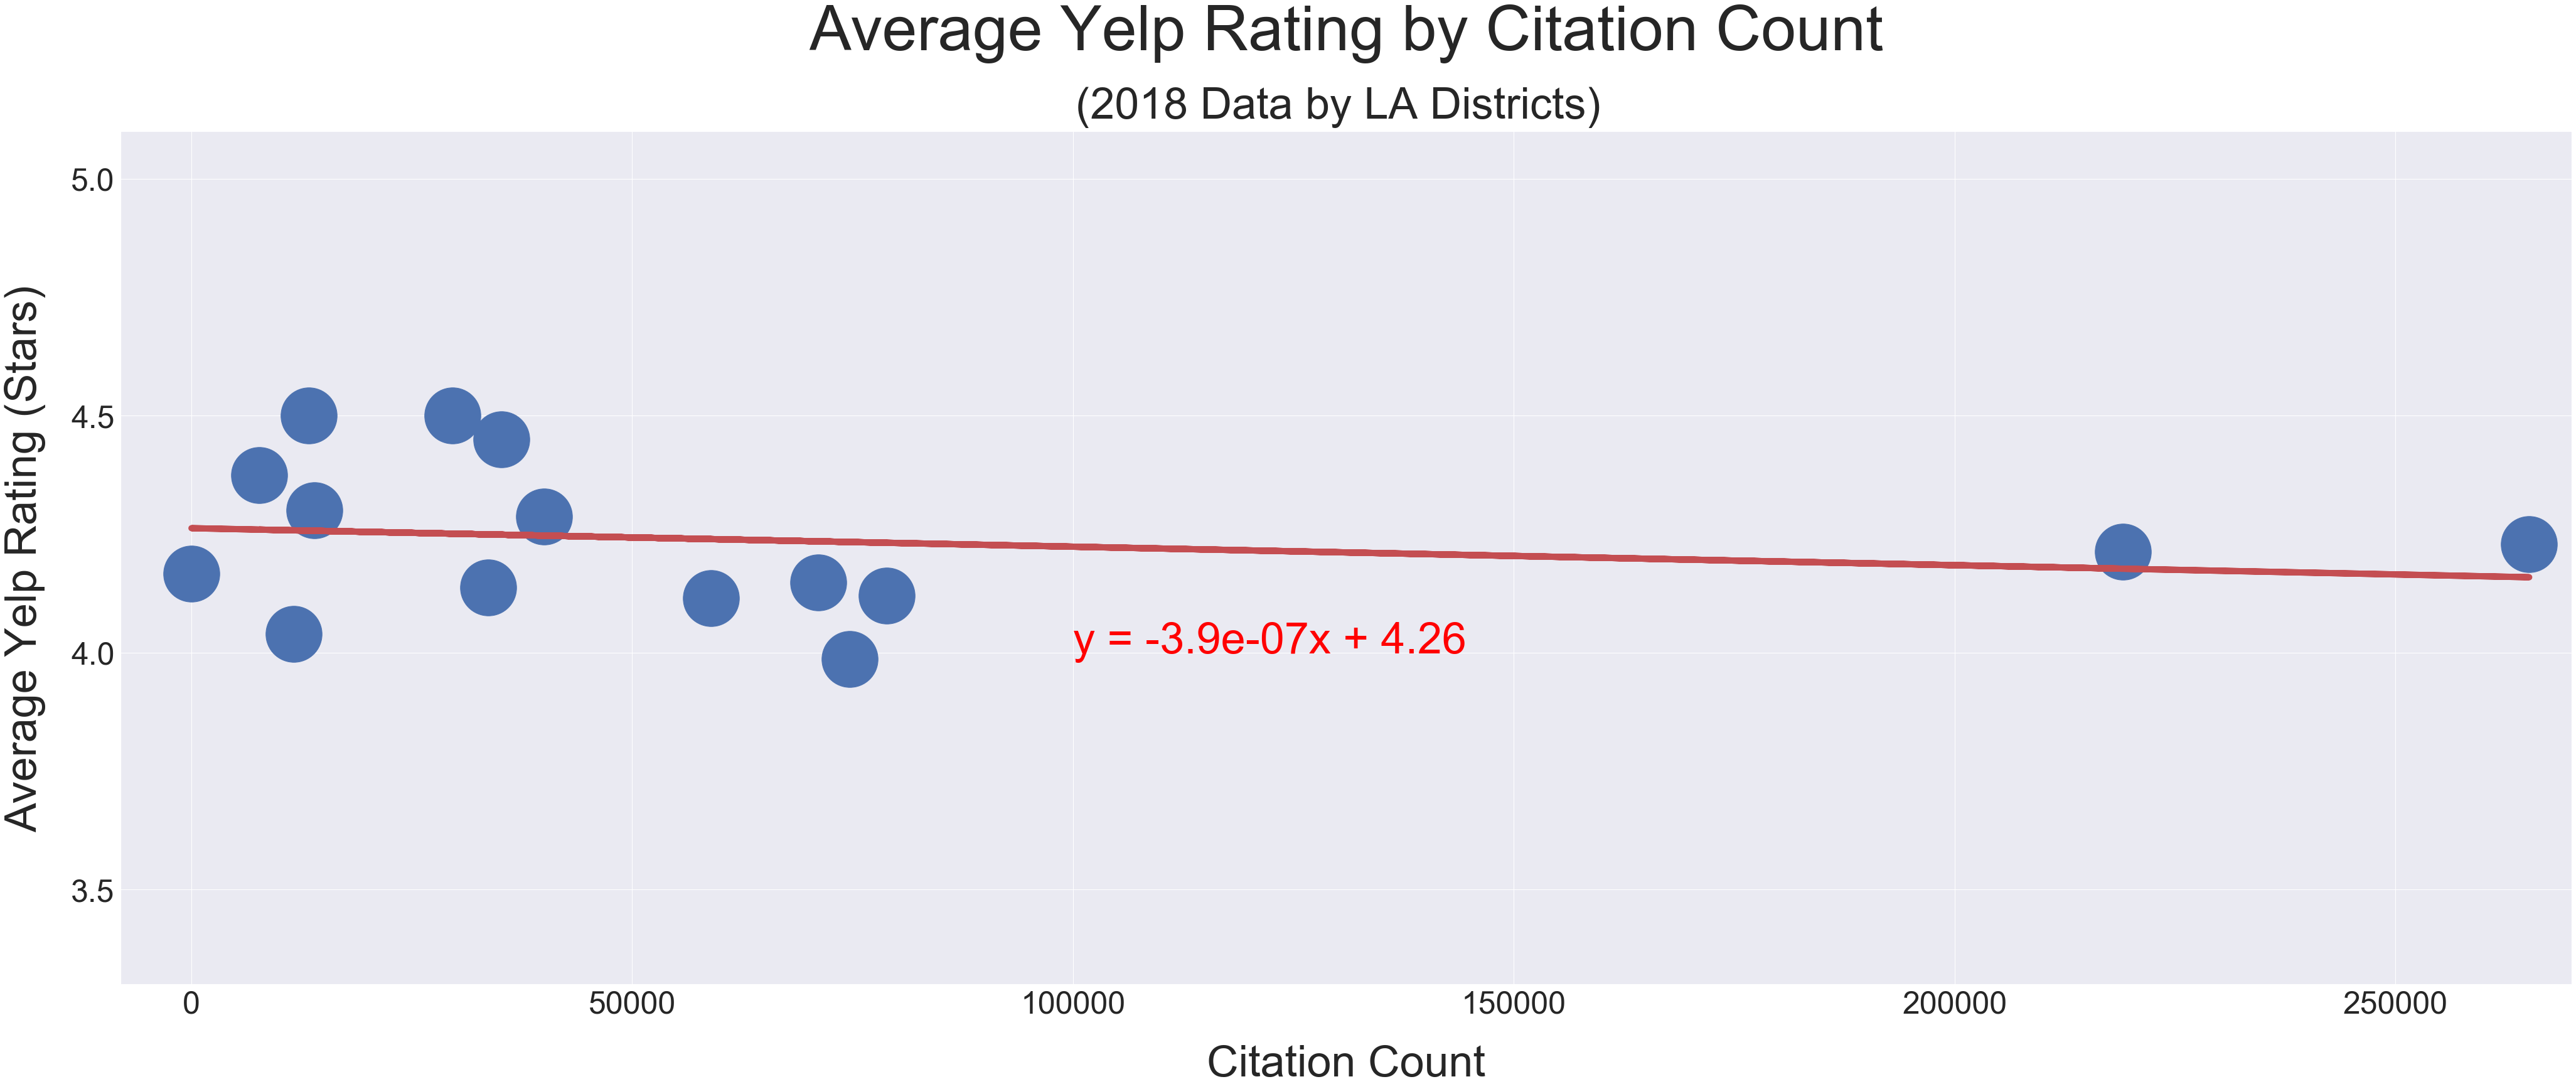

In [10]:
# Plot the data frame created above

fig = plt.figure(figsize=(70,25))

# Set the x and y variables

avg_rating = yelp_rev_by_citation_count["rating"]
citation_count = yelp_rev_by_citation_count["Citation Count"]

# Plot using scatter plot

plt.scatter(citation_count, avg_rating, s=8000)

# Set the x and y ticks for the graph so that the data is displayed clearly

plt.xticks(ticks=np.arange(0, 270900, 50000), fontsize=50)
plt.yticks(ticks=np.arange(3.5, 5.5, 0.5), fontsize=50)

# Set the x and y limits so that the graph display doesn't cut any information off

plt.xlim(-8000,270000)
plt.ylim(3.3,5.1)

# Set the x and y labels, the title, and a subtitle

plt.xlabel('Citation Count', fontsize=70, labelpad=40)
plt.ylabel('Average Yelp Rating (Stars)', fontsize=70, labelpad=40)
plt.title("Average Yelp Rating by Citation Count", fontsize=100, pad = 130)
plt.suptitle("(2018 Data by LA Districts)", x = 0.51, y =0.92,fontsize=70)

# Get the regression line for the data and plot it on the graph
# Create the line equation and place it on the graph for visualization

yc_slope, yc_int, yc_r, yc_p, yc_std_err = stats.linregress(citation_count, avg_rating)
yc_fit = yc_slope*citation_count+yc_int
line_eq = "y = " + str(round(yc_slope,8)) + "x + " + str(round(yc_int,2))
plt.annotate(line_eq,(100000, 4),fontsize=70,color="red")

# Plot the regression line

plt.plot(citation_count,yc_fit,"r-",linewidth=10)

In [11]:
# Save the graph image

fig.savefig('Average_Yelp_Rating_by_Citation_Count_Reg.png')

# Close the graph

plt.close()

In [12]:
# Read the citation average fine csv file

citation_avg_fine = pd.read_csv("Citation_2018_Avg_Fine_by_District.csv", encoding="UTF-8", low_memory = False)  

# Rename the column for merging later

citation_avg_fine_df = citation_avg_fine.rename(columns={"district":"District"})

# Display the data

citation_avg_fine_df.head()

,District,Fine amount
0,alhambra,81.357143
1,beverly hills,66.718477
2,burbank,68.380998
3,calabasas,72.556482
4,carson,73.588115


In [13]:
# Merge the yelp review count and average citation fine amount data

yelp_count_by_citation_fine = (yelp_count_by_district.merge(citation_avg_fine_df, how = "outer", on = "District")).dropna()

# Display the merged data

yelp_count_by_citation_fine.head()

,District,review_count,Fine amount
5,beverly hills,258077.0,66.718477
7,burbank,3859.0,68.380998
8,calabasas,131993.0,72.556482
10,culver city,219083.0,69.206951
11,el segundo,30310.0,69.019697


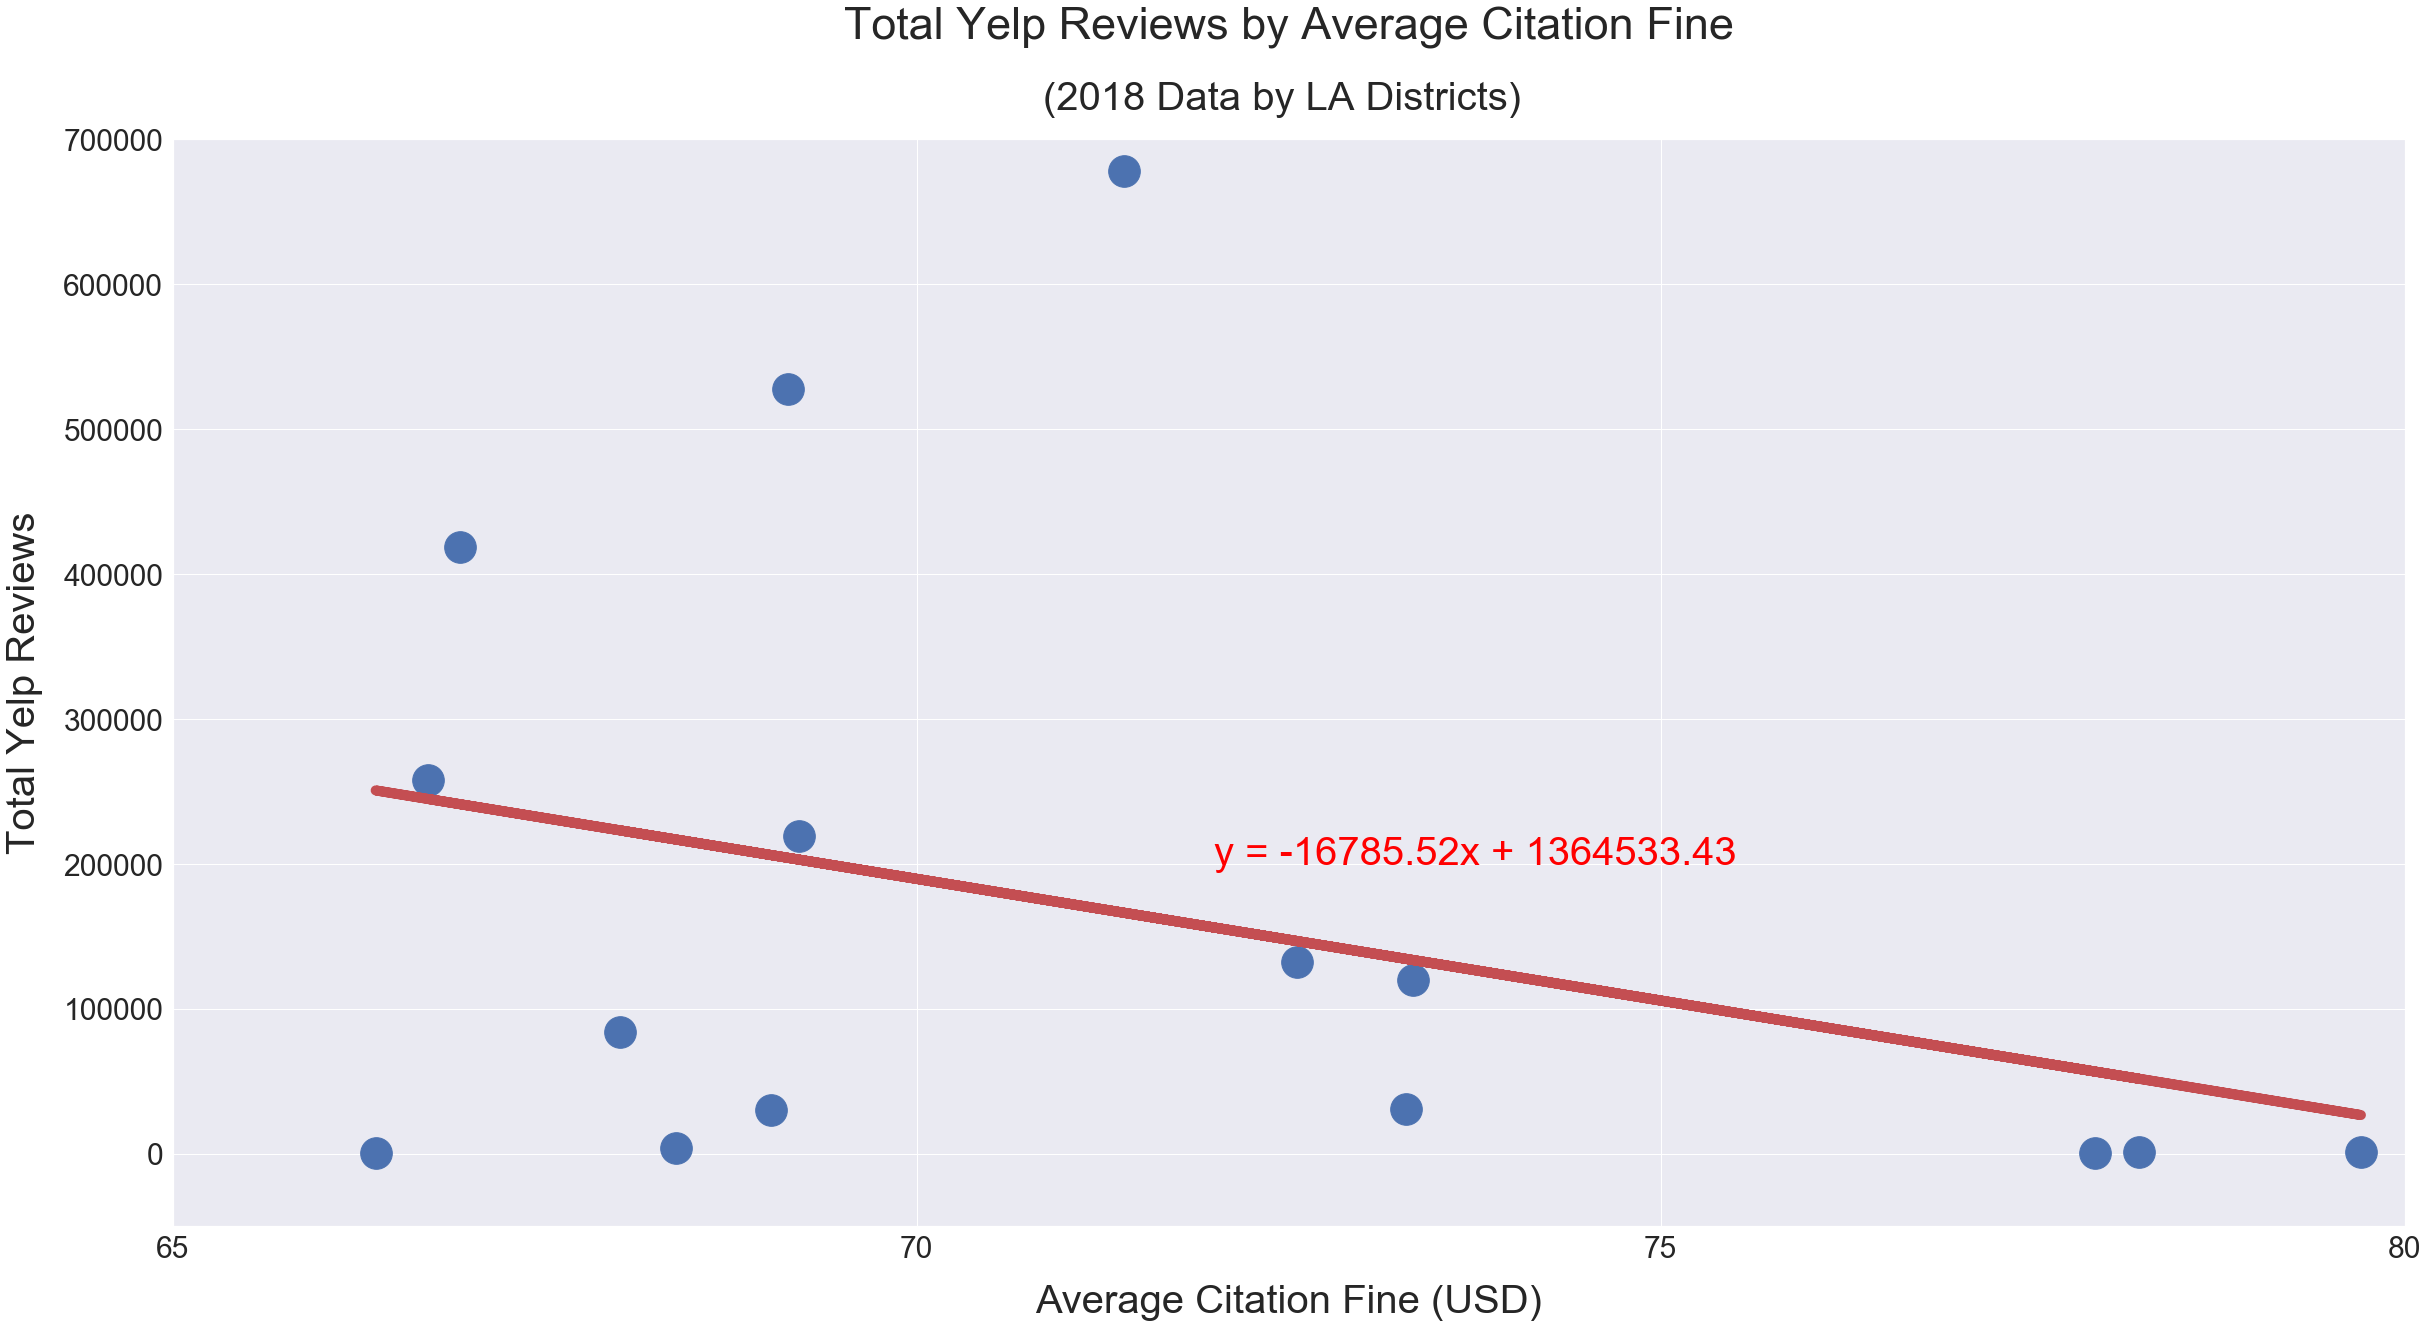

In [14]:
# Plot the data frame created above

fig = plt.figure(figsize=(40,20))

# Set the x and y variables

rev_count = yelp_count_by_citation_fine["review_count"]
avg_fine = yelp_count_by_citation_fine["Fine amount"]

# Plot using scatter plot

plt.scatter(avg_fine, rev_count, s=1000)

# Set the x and y ticks for the graph so that the data is displayed clearly

plt.xticks(ticks=np.arange(65, 82, 5), fontsize=30)
plt.yticks(ticks=np.arange(0, 800000, 100000), fontsize=30)

# Set the x and y limits so that the graph display doesn't cut any information off

plt.xlim(65,80)
plt.ylim(-50000,700000)

# Set the x and y labels, the title, and a subtitle

plt.xlabel('Average Citation Fine (USD)', fontsize=40, labelpad=20)
plt.ylabel('Total Yelp Reviews', fontsize=40, labelpad=20)
plt.title("Total Yelp Reviews by Average Citation Fine", fontsize=45, pad = 100)
plt.suptitle("(2018 Data by LA Districts)", x = 0.51, y =0.92,fontsize=40)

# Get the regression line for the data and plot it on the graph
# Create the line equation and place it on the graph for visualization

yc_slope, yc_int, yc_r, yc_p, yc_std_err = stats.linregress(avg_fine, rev_count)
yc_fit = yc_slope*avg_fine+yc_int
line_eq = "y = " + str(round(yc_slope,2)) + "x + " + str(round(yc_int,2))
plt.annotate(line_eq,(72, 200000),fontsize=40,color="red")

# Plot the regression line

plt.plot(avg_fine,yc_fit,"r-",linewidth=10)

In [15]:
# Save the graph image

fig.savefig('Total_Yelp_Reviews_by_Average_Citation_Fine_Reg.png')

# Close the graph

plt.close()

In [16]:
# Merge average yelp rating and average citation fine amount
# Drop NaN values

yelp_rating_by_avg_fine = (yelp_rev_by_district.merge(citation_avg_fine_df, how = "outer", on = "District")).dropna()

# Display merged data frame

yelp_rating_by_avg_fine.head()

,District,rating,Fine amount
5,beverly hills,4.120312,66.718477
7,burbank,4.450000,68.380998
8,calabasas,4.137874,72.556482
10,culver city,4.114478,69.206951
11,el segundo,4.039474,69.019697


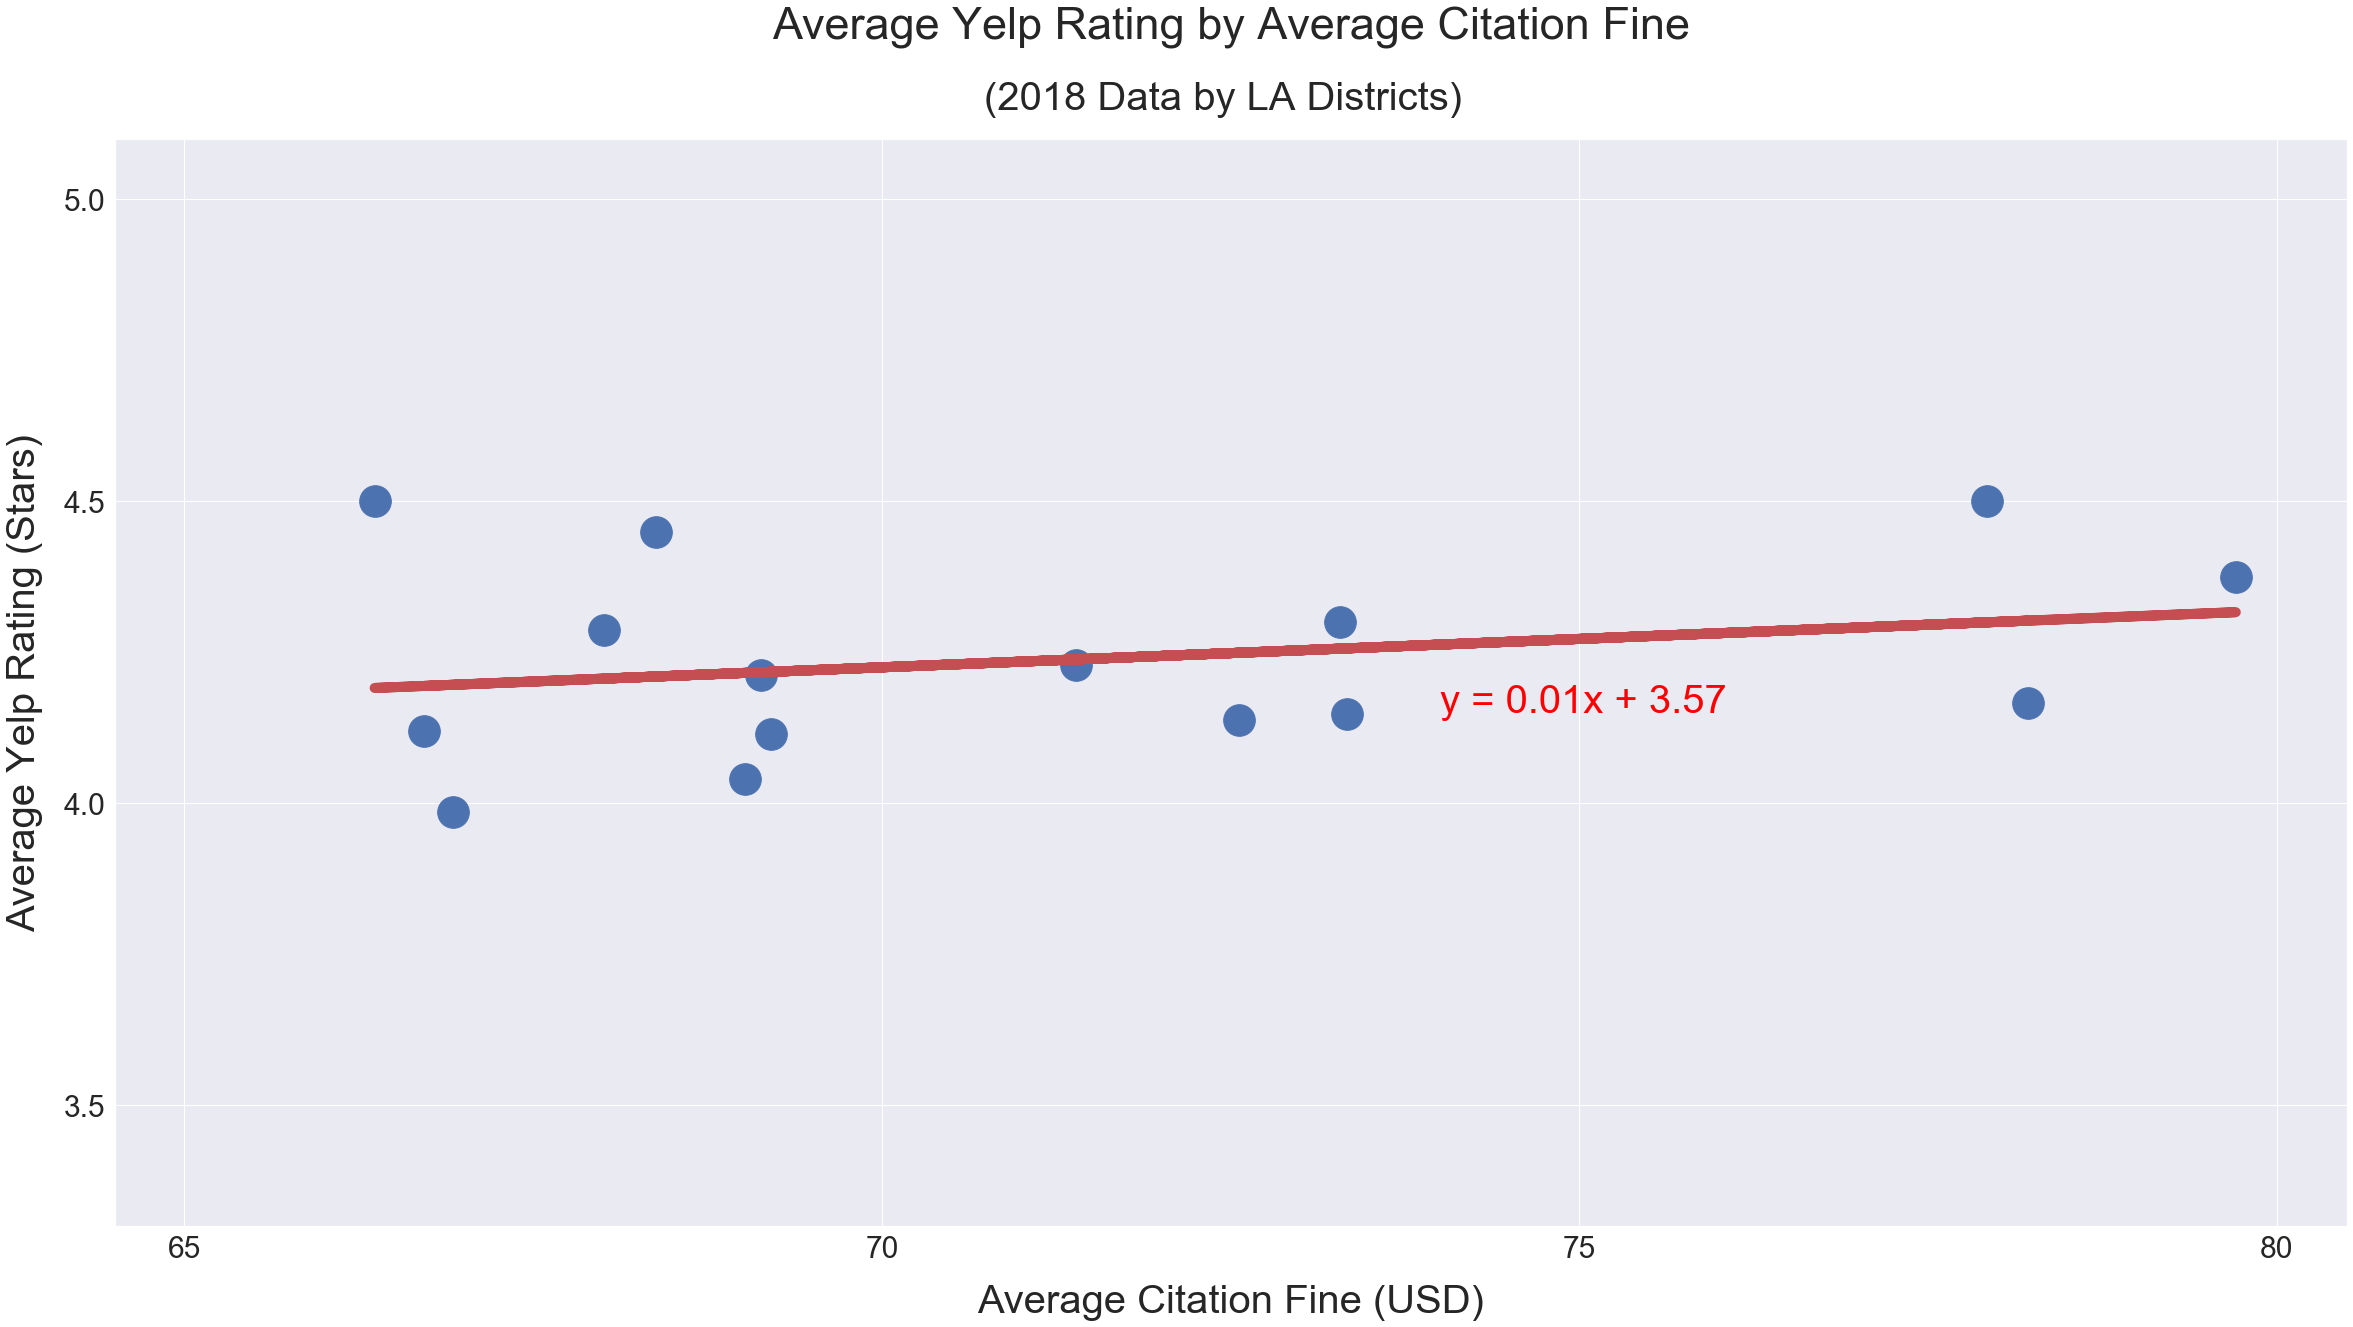

In [17]:
# Plot the data frame created above

fig = plt.figure(figsize=(40,20))

# Set the x and y variables

avg_rating = yelp_rating_by_avg_fine["rating"]
avg_fine = yelp_rating_by_avg_fine["Fine amount"]

# Plot using scatter plot

plt.scatter(avg_fine, avg_rating, s=1000)

# Set the x and y ticks for the graph so that the data is displayed clearly

plt.xticks(ticks=np.arange(65, 82, 5), fontsize=30)
plt.yticks(ticks=np.arange(3.5, 5.5, 0.5), fontsize=30)

# Set the x and y limits so that the graph display doesn't cut any information off

plt.xlim(64.5,80.5)
plt.ylim(3.3,5.1)

# Set the x and y labels, the title, and a subtitle

plt.xlabel('Average Citation Fine (USD)', fontsize=40, labelpad=20)
plt.ylabel('Average Yelp Rating (Stars)', fontsize=40, labelpad=20)
plt.title("Average Yelp Rating by Average Citation Fine", fontsize=45, pad = 100)
plt.suptitle("(2018 Data by LA Districts)", x = 0.51, y =0.92,fontsize=40)

# Get the regression line for the data and plot it on the graph
# Create the line equation and place it on the graph for visualization

yc_slope, yc_int, yc_r, yc_p, yc_std_err = stats.linregress(avg_fine, avg_rating)
yc_fit = yc_slope*avg_fine+yc_int
line_eq = "y = " + str(round(yc_slope,2)) + "x + " + str(round(yc_int,2))
plt.annotate(line_eq,(74,4.15),fontsize=40,color="red")

# Plot the regression line

plt.plot(avg_fine,yc_fit,"r-",linewidth=10)

In [18]:
# Save the graph image

fig.savefig('Average_Yelp_Rating_by_Average_Citation_Fine_Reg.png')

# Close the graph

plt.close()

In [19]:
# Read the crime count CSV file

crime_count_df = pd.read_csv("Crime_Data_2018_by_District.csv", encoding="UTF-8", low_memory = False)  

# Clean up data by renaming columns

crime_count_df = crime_count_df.rename(columns={"index": "District", "district":"Crime_count"})

# Display data

crime_count_df.head()

,District,Crime_count
0,los angeles,47264
1,san fernando,31715
2,west hollywood,28891
3,calabasas,19580
4,westmont,16319


In [20]:
# Merge the Yelp Review Count with the Crime Count data
# Drop NaN values

yelp_count_by_crime_count = (yelp_count_by_district.merge(crime_count_df, how = "outer", on = "District")).dropna()

# Display merged data frame

yelp_count_by_crime_count.head()

,District,review_count,Crime_count
5,beverly hills,258077.0,9368.0
7,burbank,3859.0,9209.0
8,calabasas,131993.0,19580.0
10,culver city,219083.0,11185.0
11,el segundo,30310.0,2527.0


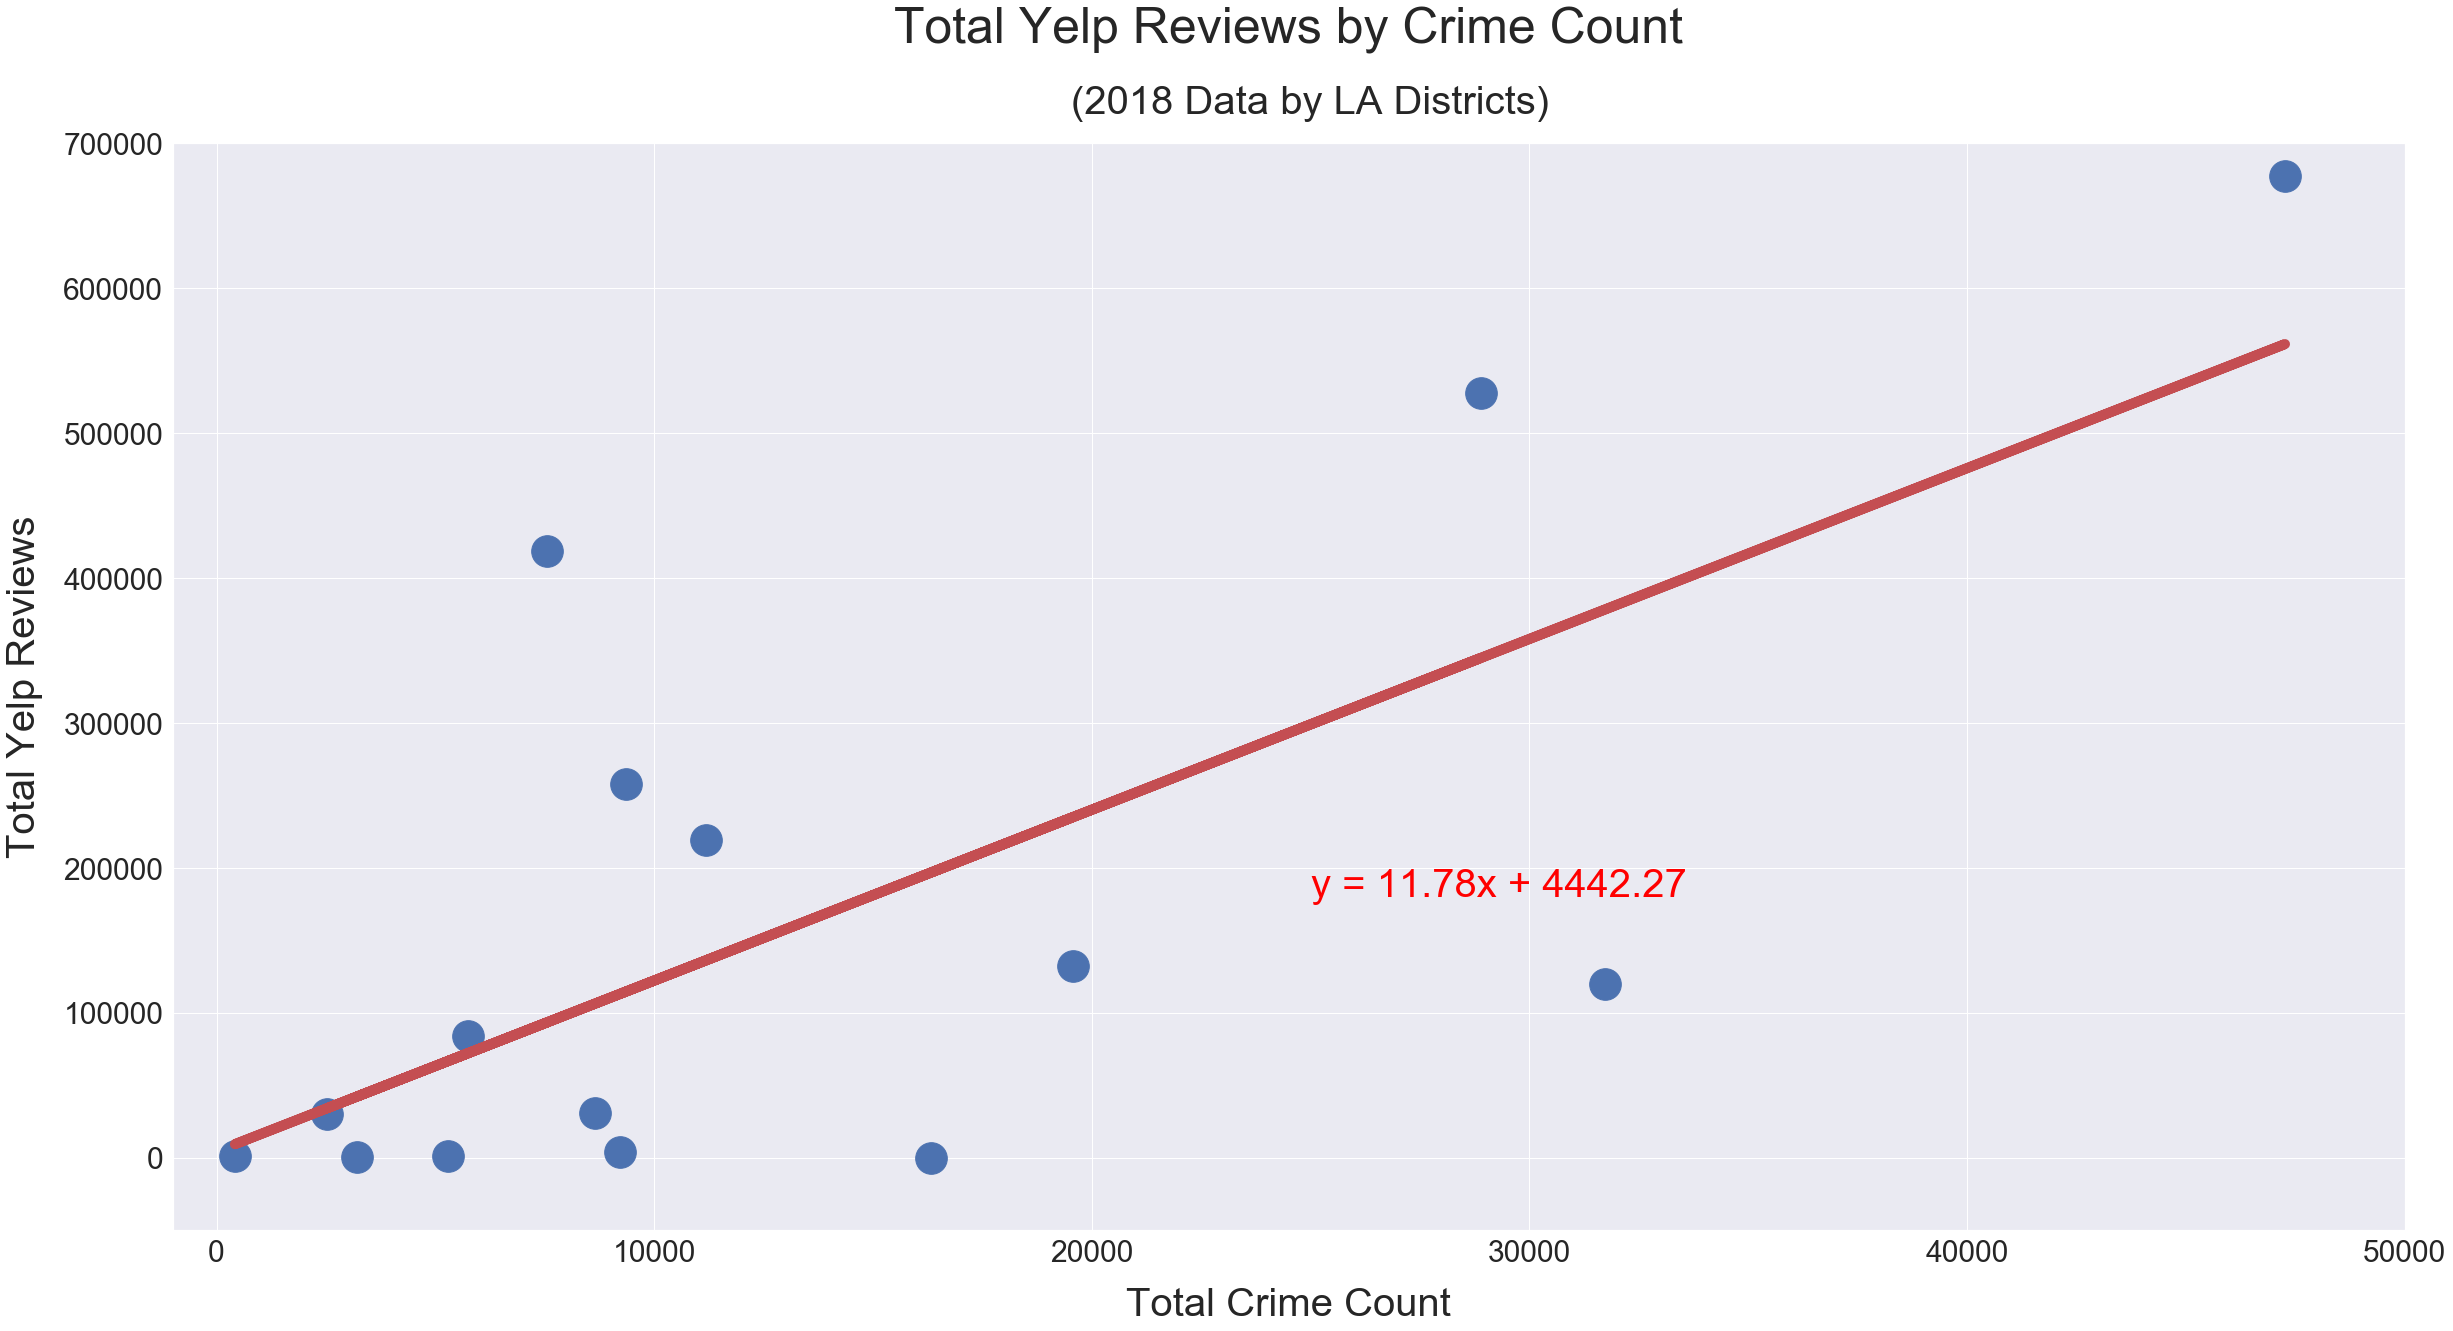

In [21]:
# Plot the data frame created above

fig = plt.figure(figsize=(40,20))

# Set the x and y variables

rev_count = yelp_count_by_crime_count["review_count"]
crime_count = yelp_count_by_crime_count["Crime_count"]

# Plot using scatter plot

plt.scatter(crime_count, rev_count, s=1000)

# Set the x and y ticks for the graph so that the data is displayed clearly

plt.xticks(ticks=np.arange(0, 60000, 10000), fontsize=30)
plt.yticks(ticks=np.arange(0, 800000, 100000), fontsize=30)

# Set the x and y limits so that the graph display doesn't cut any information off

plt.xlim(-1000,50000)
plt.ylim(-50000,700000)

# Set the x and y labels, the title, and a subtitle

plt.xlabel('Total Crime Count', fontsize=40, labelpad=20)
plt.ylabel('Total Yelp Reviews', fontsize=40, labelpad=20)
plt.title("Total Yelp Reviews by Crime Count", fontsize=50, pad = 100)
plt.suptitle("(2018 Data by LA Districts)", x = 0.52, y =0.92,fontsize=40)

# Get the regression line for the data and plot it on the graph
# Create the line equation and place it on the graph for visualization

yc_slope, yc_int, yc_r, yc_p, yc_std_err = stats.linregress(crime_count, rev_count)
yc_fit = yc_slope*crime_count+yc_int
line_eq = "y = " + str(round(yc_slope,2)) + "x + " + str(round(yc_int,2))
plt.annotate(line_eq,(25000,180000),fontsize=40,color="red")

# Plot the regression line

plt.plot(crime_count,yc_fit,"r-",linewidth=10)

In [22]:
# Save the graph image

fig.savefig('Total_Yelp_Reviews_by_Crime_Count_Reg.png')

# Close the graph

plt.close()

In [23]:
# Merge the Yelp Average Rating and the Crime Count data
# Drop NaN values

avg_rat_by_crime_count = (yelp_rev_by_district.merge(crime_count_df, how = "outer", on = "District")).dropna()

# Display merged data frame

avg_rat_by_crime_count.head()

,District,rating,Crime_count
5,beverly hills,4.120312,9368.0
7,burbank,4.450000,9209.0
8,calabasas,4.137874,19580.0
10,culver city,4.114478,11185.0
11,el segundo,4.039474,2527.0


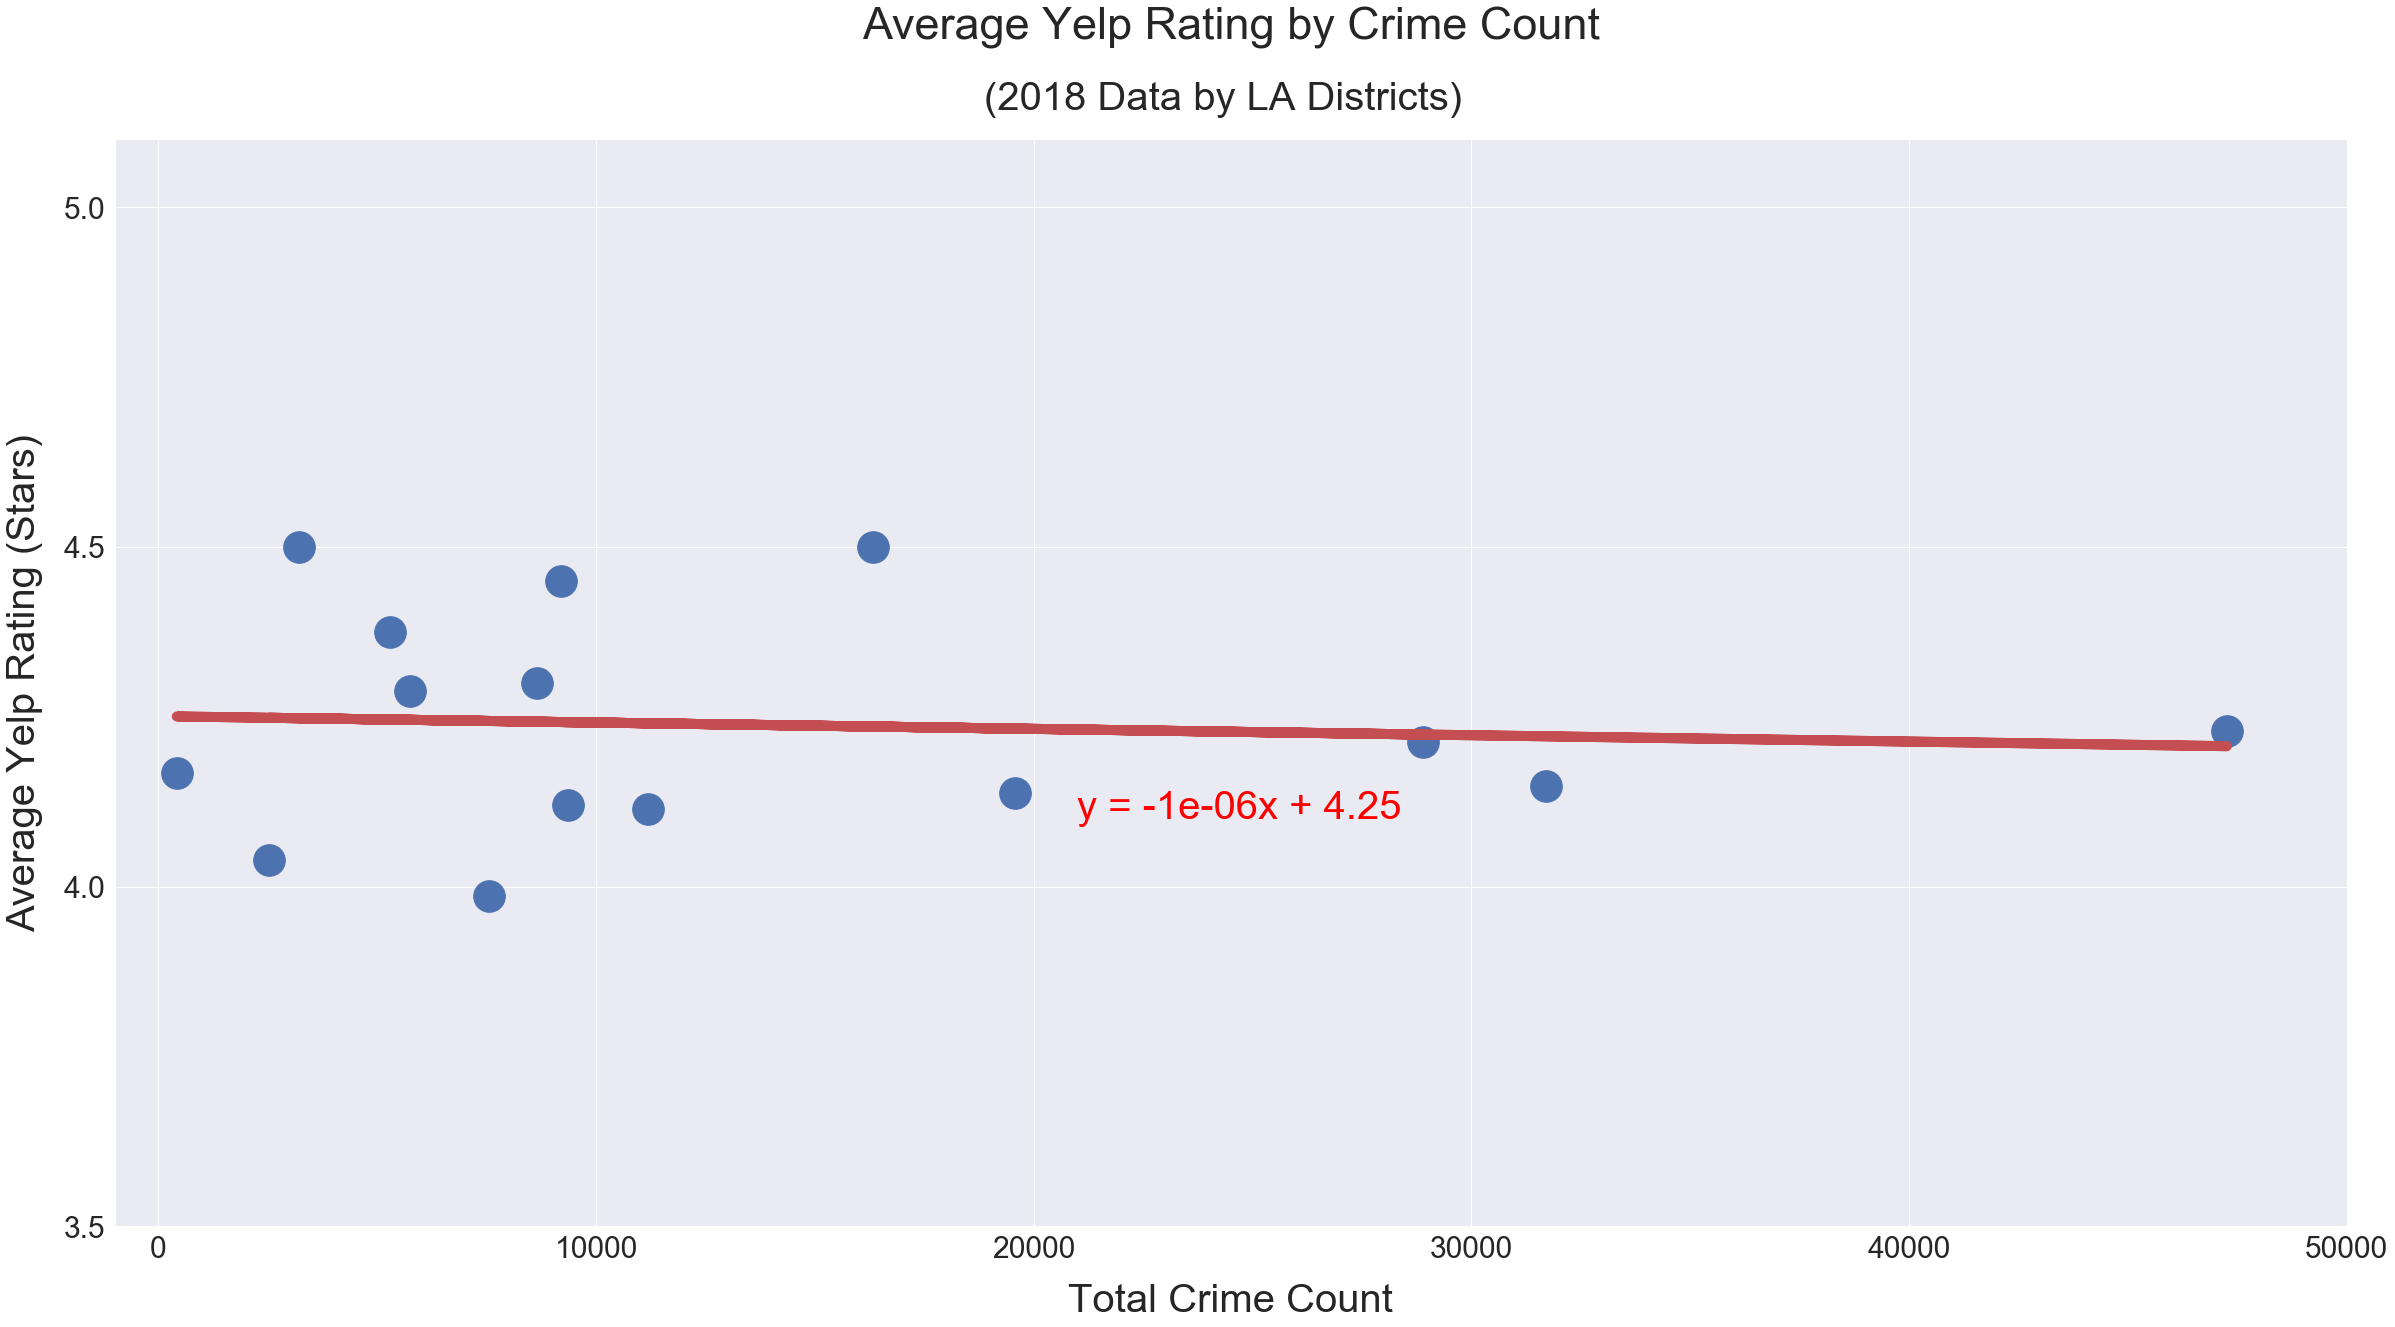

In [24]:
# Plot the data frame created above

fig = plt.figure(figsize=(40,20))

# Set the x and y variables

yelp_rev = avg_rat_by_crime_count["rating"]
crime_count = avg_rat_by_crime_count["Crime_count"]

# Plot using scatter plot

plt.scatter(crime_count, yelp_rev, s=1000)

# Set the x and y ticks for the graph so that the data is displayed clearly

plt.xticks(ticks=np.arange(0, 60000, 10000), fontsize=30)
plt.yticks(ticks=np.arange(3.5, 5.5, 0.5), fontsize=30)

# Set the x and y limits so that the graph display doesn't cut any information off

plt.xlim(-1000,50000)
plt.ylim(3.5,5.1)

# Set the x and y labels, the title, and a subtitle

plt.xlabel('Total Crime Count', fontsize=40, labelpad=20)
plt.ylabel('Average Yelp Rating (Stars)', fontsize=40, labelpad=20)
plt.title("Average Yelp Rating by Crime Count", fontsize=45, pad = 100)
plt.suptitle("(2018 Data by LA Districts)", x = 0.51, y =0.92,fontsize=40)

# Get the regression line for the data and plot it on the graph
# Create the line equation and place it on the graph for visualization

yc_slope, yc_int, yc_r, yc_p, yc_std_err = stats.linregress(crime_count, yelp_rev)
yc_fit = yc_slope*crime_count+yc_int
line_eq = "y = " + str(round(yc_slope,6)) + "x + " + str(round(yc_int,2))
plt.annotate(line_eq,(21000,4.1),fontsize=40,color="red")

# Plot the regression line

plt.plot(crime_count,yc_fit,"r-",linewidth=10)

In [25]:
# Save the graph image

fig.savefig('Average_Yelp_Rating_by_Crime_Count_Reg.png')

# Close the graph

plt.close()